# Principal Component Analysis

Principal Component Analysis (PCA) is a linear dimensionality reduction technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space. It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation.

Dimensions are nothing but features that represent the data. For example, A 28 X 28 image has 784 picture elements (pixels) that are the dimensions or features which together represent that image.

One important thing to note about PCA is that it is an Unsupervised dimensionality reduction technique, you can cluster the similar data points based on the feature correlation between them without any supervision (or labels), and you will learn how to achieve this practically using Python in later sections of this tutorial!

One important thing to note about PCA is that it is an Unsupervised dimensionality reduction technique, you can cluster the similar data points based on the feature correlation between them without any supervision (or labels).
PCA is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values of linearly uncorrelated variables called principal components. Features, Dimensions, and Variables are all referring to the same thing in this notebook. 


#### Main usage of PCA
* Data Visualization
When working on any data related problem, extensive data exploration like finding out how the variables are correlated or understanding the distribution of a few variables is crucial. Considering that there are a large number of variables or dimensions along which the data is distributed, visualization can be a challenge and almost impossible. Using dimensionality reduction, data can be projected into a lower dimension, thereby allowing you to visualize the data in a 2D or 3D space.


* Speeding Machine Learning Algorithm
Since PCA's main idea is dimensionality reduction, you can leverage that to speed up your machine learning algorithm's training and testing time considering your data has a lot of features, and the ML algorithm's learning is too slow.

#### Principal Component
Principal components are the key to PCA; they represent what's underneath the hood of your data. In a layman term, when the data is projected into a lower dimension (assume three dimensions) from a higher space, the three dimensions are nothing but the three Principal Components that captures (or holds) most of the variance (information) of your data.

Principal components have both direction and magnitude. The direction represents across which principal axes the data is mostly spread out or has most variance and the magnitude signifies the amount of variance that Principal Component captures of the data when projected onto that axis. The principal components are a straight line, and the first principal component holds the most variance in the data. Each subsequent principal component is orthogonal to the last and has a lesser variance. In this way, given a set of x correlated variables over y samples you achieve a set of u uncorrelated principal components over the same y samples.

The reason you achieve uncorrelated principal components from the original features is that the correlated features contribute to the same principal component, thereby reducing the original data features into uncorrelated principal components; each representing a different set of correlated features with different amounts of variation.

Each principal component represents a percentage of total variation captured from the data.

#### PCA on iris dataset
In this section we will decompose with PCA very simple 4-dimensional data set. This is ono eg the best known pattern recognition dataset. The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 

In [49]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston, load_breast_cancer
#from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
#from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso


%matplotlib inline

In [50]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [51]:
iris_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [52]:
# loading dataset into Pandas DataFrame
df_iris = pd.read_csv('iris.data' ,names=['sepal length','sepal width','petal length','petal width','target'])

In [53]:
df_iris.head(15)

sepal length  sepal width  petal length  petal width       target
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3          3.0           1.1          0.1  Iris-setosa
14           5.8          4.0           1.2          0.2  Iris-setosa

In the case that the dimensionality of the data allows it, it is good practice to see how each pair of features correlate with each other. In the followinglink you will find more methods for visualizing multidimensional data using matplotlib and seaborn libraries
https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57

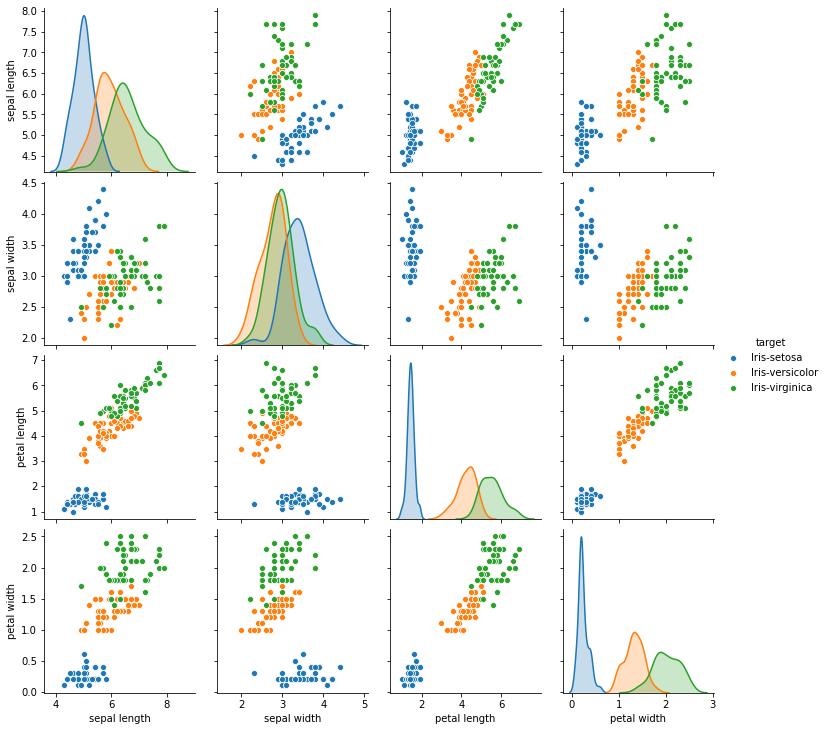

In [54]:
sns.pairplot(df_iris, hue='target')

You can immediately see that the features petal length and petal width are strongly correlated


### Standardize the Data

Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data, especially, if it was measured on different scales. Although, all features in the Iris dataset were measured in centimeters, let us continue with the transformation of the data onto unit scale (mean=0 and variance=1), which is a requirement for the optimal performance of many machine learning algorithms.


In [55]:
features_iris = ['sepal length', 'sepal width', 'petal length', 'petal width']
x_iris = df_iris.loc[:, features_iris].values

In [56]:
y_iris = df_iris.loc[:,['target']].values

In [57]:
x_iris = StandardScaler().fit_transform(x_iris)

In [58]:
df_iris_standarize = pd.DataFrame(data = x_iris, columns = features_iris)
df_iris_standarize['target'] = df_iris['target']
df_iris_standarize.head(15)

sepal length  sepal width  petal length  petal width       target
0      -0.900681     1.032057     -1.341272    -1.312977  Iris-setosa
1      -1.143017    -0.124958     -1.341272    -1.312977  Iris-setosa
2      -1.385353     0.337848     -1.398138    -1.312977  Iris-setosa
3      -1.506521     0.106445     -1.284407    -1.312977  Iris-setosa
4      -1.021849     1.263460     -1.341272    -1.312977  Iris-setosa
5      -0.537178     1.957669     -1.170675    -1.050031  Iris-setosa
6      -1.506521     0.800654     -1.341272    -1.181504  Iris-setosa
7      -1.021849     0.800654     -1.284407    -1.312977  Iris-setosa
8      -1.748856    -0.356361     -1.341272    -1.312977  Iris-setosa
9      -1.143017     0.106445     -1.284407    -1.444450  Iris-setosa
10     -0.537178     1.494863     -1.284407    -1.312977  Iris-setosa
11     -1.264185     0.800654     -1.227541    -1.312977  Iris-setosa
12     -1.264185    -0.124958     -1.341272    -1.444450  Iris-setosa
13     -1.870024    -0.124958     -1.511870    -1.444450  Iris-setosa
14     -0.052506     2.189072     -1.455004    -1.312977  Iris-setosa

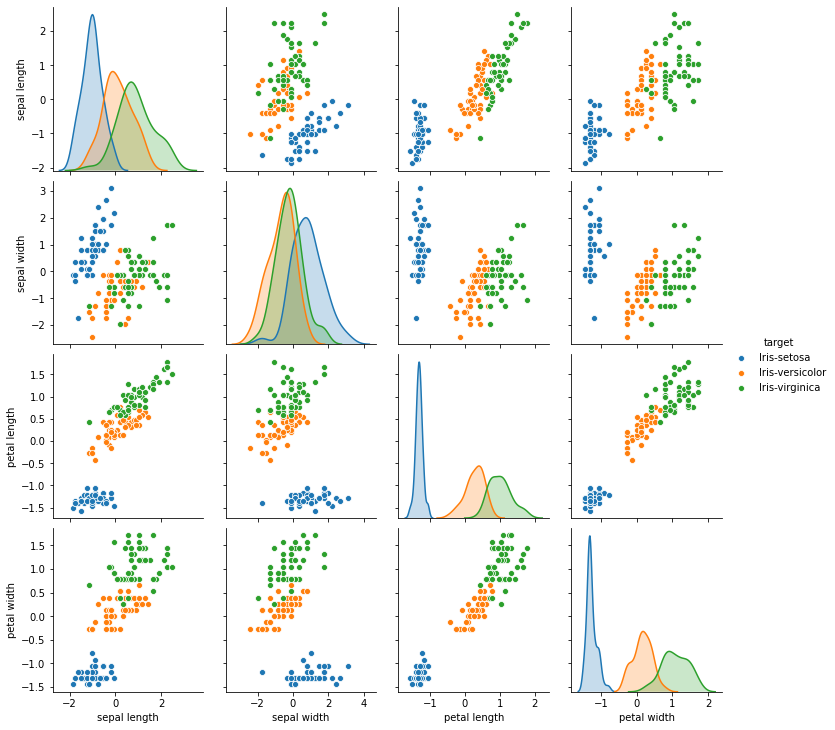

In [59]:
sns.pairplot(df_iris_standarize, hue='target')

We can see that the distributions are now standardized

### PCA Projection to 2D

In [60]:
pca_iris = PCA(n_components=2)

In [61]:
principalComponents_iris = pca_iris.fit_transform(x_iris)

In [62]:
principalDf_iris = pd.DataFrame(data = principalComponents_iris ,columns = ['principal component 1', 'principal component 2'])


In [63]:
finalDf_iris = pd.concat([principalDf_iris, df_iris[['target']]], axis = 1)
finalDf_iris.head(15)

principal component 1  principal component 2       target
0               -2.264542               0.505704  Iris-setosa
1               -2.086426              -0.655405  Iris-setosa
2               -2.367950              -0.318477  Iris-setosa
3               -2.304197              -0.575368  Iris-setosa
4               -2.388777               0.674767  Iris-setosa
5               -2.070537               1.518549  Iris-setosa
6               -2.445711               0.074563  Iris-setosa
7               -2.233842               0.247614  Iris-setosa
8               -2.341958              -1.095146  Iris-setosa
9               -2.188676              -0.448629  Iris-setosa
10              -2.163487               1.070596  Iris-setosa
11              -2.327378               0.158587  Iris-setosa
12              -2.224083              -0.709118  Iris-setosa
13              -2.639716              -0.938282  Iris-setosa
14              -2.192292               1.889979  Iris-setosa


### Visualize 2D Projection

Use a PCA projection to 2d to visualize the entire data set. You should plot different classes using different colors or shapes.

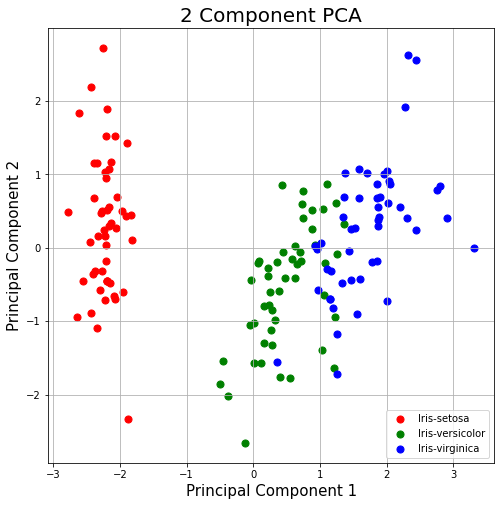

In [64]:


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


iris_targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(iris_targets,colors):
    indicesToKeep = finalDf_iris['target'] == target
    ax.scatter(finalDf_iris.loc[indicesToKeep, 'principal component 1']
               , finalDf_iris.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(iris_targets)
ax.grid()



iris-setosa is linearry separablo from others class

### Explained Variance

The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [65]:
pca_iris.explained_variance_ratio_

array([0.72770452, 0.23030523])

Together, the first two principal components contain 95.80% of the information. The first principal component contains 72.77% of the variance and the second principal component contains 23.03% of the variance. The third and fourth principal component contained the rest of the variance of the dataset.

### limitations of PCA

* PCA is not scale invariant. check: we need to scale our data first.
    
* The directions with largest variance are assumed to be of the most interest

* Only considers orthogonal transformations (rotations) of the original variables
 
* PCA is only based on the mean vector and covariance matrix. Some distributions (multivariate normal) are characterized by this, but some are not.

* If the variables are correlated, PCA can achieve dimension reduction. If not, PCA just orders them according to their variances.




### Exercises - Perform PCA for breast cancer dataset

* You can find this dataset it in the scikit learn library, import it and convert to pandas dataframe, original label are '0' and '1' for better readability change these names to: 'benign' and 'malignant'

In [66]:
# TODO
cancer_data = load_breast_cancer()

In [67]:
# TODO
df_cancer = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
df_cancer['target'] = pd.Categorical(pd.Series(cancer_data.target).map(lambda x: cancer_data.target_names[x]))
df_cancer

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                   0.07871  ...          17.33           184.60      2019.0   
1                   0.05667  ...          23.41           158.80      1956.0   
2                   0.05999  ...          25.53           152.50      1709.0   
3                   0.09744  ...          26.50            98.87       567.7   
4                   0.05883  ...          16.67           152.20      1575.0   
..                      ...  ...            ...              ...         ...   
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension     target  
0                  0.2654          0.4601                  0.11890  malignant  
1                  0.1860          0.2750                  0.08902  malignant  
2                  0.2430          0.3613                  0.08758  malignant  
3                  0.2575          0.6638                  0.17300  malignant  
4                  0.1625          0.2364        


* Visualizes correlations between pairs of features (due to the greater number of features use pandas corr () function instead of pairplot instead of seaborn heatmap ())

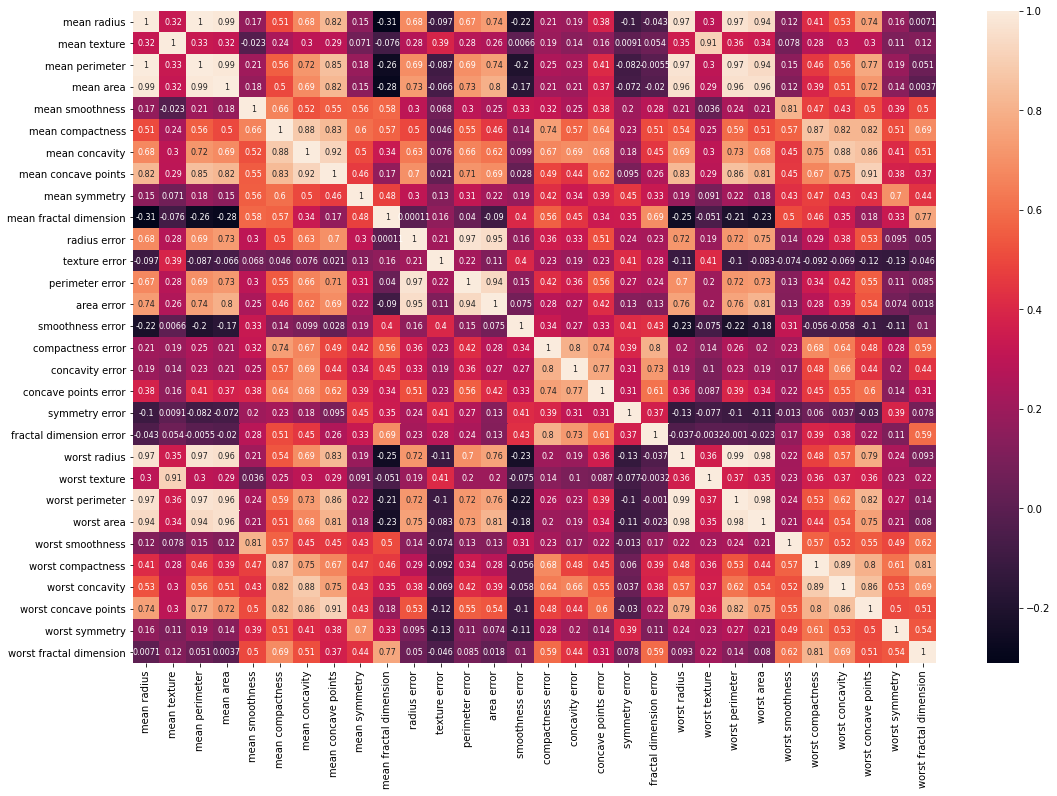

In [68]:
# TODO
corr = df_cancer.corr()
fig, ax = plt.subplots(figsize=(18,12)) 
sns.heatmap(corr,
        annot=True,
        ax=ax,
        annot_kws={"size":8})

* Perform PCA and visualize the data

In [69]:
x_cancer = df_cancer.loc[:, cancer_data.feature_names].values
x_cancer = StandardScaler().fit_transform(x_cancer)
df_cancer_standarize = pd.DataFrame(data = x_cancer, columns = cancer_data.feature_names)
df_cancer_standarize['target'] = df_cancer['target']
df_cancer_standarize.head(15)

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0      1.097064     -2.073335        1.269934   0.984375         1.568466   
1      1.829821     -0.353632        1.685955   1.908708        -0.826962   
2      1.579888      0.456187        1.566503   1.558884         0.942210   
3     -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4      1.750297     -1.151816        1.776573   1.826229         0.280372   
5     -0.476375     -0.835335       -0.387148  -0.505650         2.237421   
6      1.170908      0.160649        1.138125   1.095295        -0.123136   
7     -0.118517      0.358450       -0.072867  -0.218965         1.604049   
8     -0.320167      0.588830       -0.184080  -0.384207         2.201839   
9     -0.473535      1.105439       -0.329482  -0.509063         1.582699   
10     0.537556      0.919273        0.442011   0.406453        -1.017686   
11     0.469393     -0.325708        0.479082   0.358672         0.052642   
12     1.432201      1.282296        1.665360   1.331355         0.073992   
13     0.489274      1.084495        0.483201   0.363507        -0.878913   
14    -0.112836      0.772668        0.067180  -0.217827         1.191289   

    mean compactness  mean concavity  mean concave points  mean symmetry  \
0           3.283515        2.652874             2.532475       2.217515   
1          -0.487072       -0.023846             0.548144       0.001392   
2           1.052926        1.363478             2.037231       0.939685   
3           3.402909        1.915897             1.451707       2.867383   
4           0.539340        1.371011             1.428493      -0.009560   
5           1.244335        0.866302             0.824656       1.005402   
6           0.088295        0.300072             0.646935      -0.064325   
7           1.140102        0.061026             0.281950       1.403355   
8           1.684010        1.219096             1.150692       1.965600   
9           2.563358        1.738872             0.941760       0.797298   
10         -0.713542       -0.700684            -0.404686      -1.035476   
11          0.471115        0.134849             0.442131       0.110921   
12          2.680858        1.477729             1.621948       2.137194   
13         -0.078478        0.132840             0.121770       0.129175   
14          2.368158        1.556825             0.808147       0.939685   

    mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 2.255747  ...      -1.359293         2.303601    2.001237   
1                -0.868652  ...      -0.369203         1.535126    1.890489   
2                -0.398008  ...      -0.023974         1.347475    1.456285   
3                 4.910919  ...       0.133984        -0.249939   -0.550021   
4                -0.562450  ...      -1.466770         1.338539    1.220724   
5                 1.890005  ...      -0.313836        -0.115009   -0.244320   
6                -0.762332  ...       0.322883         1.368325    1.275220   
7                 1.660353  ...       0.401048         0.099449    0.028859   
8                 1.572462  ...       0.822813        -0.031609   -0.248363   
9                 2.783096  ...       2.443109        -0.286278   -0.297409   
10               -0.826124  ...       1.335771         0.492622    0.473611   
11               -0.280347  ...       0.261002         0.870902    0.735540   
12                2.155097  ...       0.694167         1.323647    0.793551   
13               -1.335044  ...       0.322883         0.141149   -0.007178   
14                1.987820  ...       1.031253         0.045834   -0.321493   

    worst smoothness  worst compactness  worst concavity  \
0           1.307686           2.616665         2.109526   
1          -0.375612          -0.430444        -0.146749   
2           0.527407           1.082932         0.854974   
3           3.394275           3.893397         1

In [70]:
# TODO
pca_cancer = PCA(n_components=2)

In [71]:
# TODO
principalComponents_cancer = pca_cancer.fit_transform(x_cancer)

In [72]:
# TODO
principalDf_cancer = pd.DataFrame(data = principalComponents_cancer, columns = ['principal component 1', 'principal component 2'])
finalDf_cancer = pd.concat([principalDf_cancer, df_cancer_standarize[['target']]], axis = 1)
finalDf_cancer.head(15)

principal component 1  principal component 2     target
0                9.192837               1.948583  malignant
1                2.387802              -3.768172  malignant
2                5.733896              -1.075174  malignant
3                7.122953              10.275589  malignant
4                3.935302              -1.948072  malignant
5                2.380247               3.949929  malignant
6                2.238883              -2.690031  malignant
7                2.143299               2.340244  malignant
8                3.174924               3.391813  malignant
9                6.351747               7.727174  malignant
10              -0.810414              -2.659275  malignant
11               2.651100               0.066568  malignant
12               8.185034               2.700976  malignant
13               0.342126              -0.968279  malignant
14               4.342379               4.861083  malignant

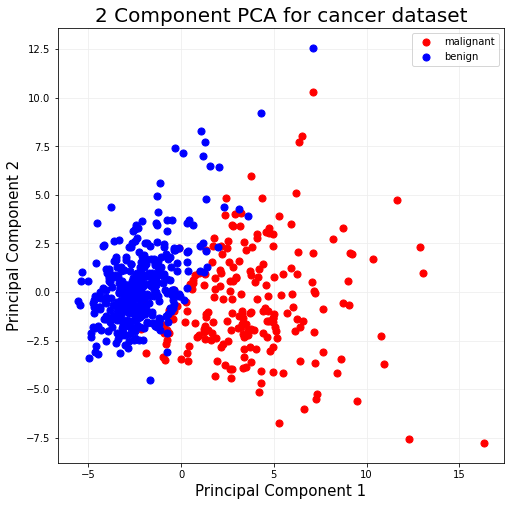

In [73]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA for cancer dataset', fontsize = 20)

cancer_targets = cancer_data.target_names
colors = ['r', 'b']
for target, color in zip(cancer_targets,colors):
    indicesToKeep = finalDf_cancer['target'] == target
    ax.scatter(finalDf_cancer.loc[indicesToKeep, 'principal component 1']
               , finalDf_cancer.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(cancer_targets)
ax.grid(color='#eeeeee')
ax.set_axisbelow(True)
plt.show()

* Examine  explained variance, draw a plot showing relation between total explained variance and number of principal components used


In [74]:
# TODO
pca_cancer.explained_variance_ratio_

array([0.44272026, 0.18971182])

In [75]:
pca_cancer = PCA(n_components=30)
pca_cancer.fit_transform(x_cancer)
ratio = pca_cancer.explained_variance_ratio_
sums = [sum(ratio[:n]) for n in range(1, 31)]
sums

[0.4427202560752634,
 0.6324320765155942,
 0.726363709089908,
 0.7923850582446096,
 0.8473427431680725,
 0.8875879635669058,
 0.910095300696731,
 0.9259825386969442,
 0.9398790324425353,
 0.9515688143366668,
 0.9613660042126471,
 0.970071383220026,
 0.9781166330919933,
 0.9833502905469196,
 0.986488122714547,
 0.9891502160796993,
 0.9911301840050236,
 0.99288414345525,
 0.9945333965144751,
 0.9955720432628139,
 0.9965711397265141,
 0.9974857864775685,
 0.9982971477364676,
 0.9988989813031393,
 0.9994150236823044,
 0.9996876116777819,
 0.9999176271402879,
 0.999970605069326,
 0.9999955651725729,
 1.0000000000000002]

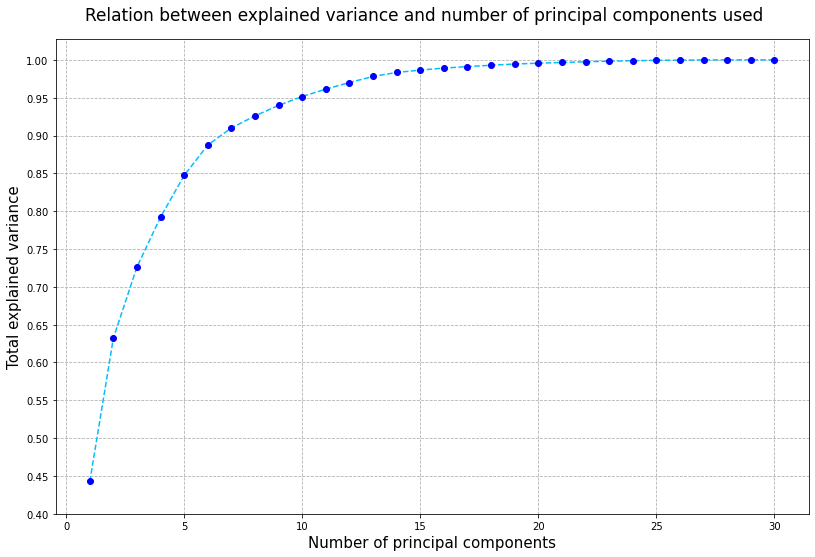

In [76]:
fig, ax = plt.subplots()
fig.set_size_inches(12,8)
fig.tight_layout(pad=4)
fig.suptitle('Relation between explained variance and number of principal components used', fontsize=17)
ax.plot(np.arange(1,31), sums, linestyle='--', marker='o', color='deepskyblue', mfc='b', mec='b')
ax.set_xlabel('Number of principal components', fontsize=15)
ax.set_ylabel('Total explained variance', fontsize=15)
ax.set_yticks(np.arange(0.4, 1.01, 0.05))
plt.grid(linestyle='--')
plt.show()

One of the components preserves almost half of total variance of the data. First 3 components preserve over 70% of total variance, which means that the dataset can be visualized in 2D or 3D quite efficiently.
Only 5 of 30 components with the biggest variance have to be taken to preserve about 85% of total variance of the dataset.

* Use recursive feature elimination (available in scikit-learn module) or another feature ranking algorithm to split 30 features to on 15 "more important" and "less important" features. Then repeat the last step from the full data set - draw a plot showing relation between total explained variance and number of principal components used for all 3 cases. Explain the result briefly.

In [77]:
# TODO
lr = LinearRegression()
cancer_features = cancer_data.feature_names
rfe = RFE(estimator=lr, n_features_to_select=15, step=1)
rfe.fit(df_cancer_standarize[cancer_features], pd.Series(cancer_data.target))
ranking = rfe.ranking_
most_important_features = [feature for i, feature in enumerate(cancer_features) if ranking[i] == 1]
less_important_features = [feature for feature in cancer_features if feature not in most_important_features]
print('Most important features: {}'.format(', '.join(most_important_features)))
print('Less important features: {}'.format(', '.join(less_important_features)))

Most important features: mean radius, mean perimeter, mean area, mean compactness, mean concavity, mean concave points, radius error, perimeter error, concavity error, concave points error, worst radius, worst texture, worst area, worst concavity, worst fractal dimension
Less important features: mean texture, mean smoothness, mean symmetry, mean fractal dimension, texture error, area error, smoothness error, compactness error, symmetry error, fractal dimension error, worst perimeter, worst smoothness, worst compactness, worst concave points, worst symmetry


## Kernel PCA

PCA is a linear method. That is it can only be applied to datasets which are linearly separable. It does an excellent job for datasets, which are linearly separable. But, if we use it to non-linear datasets, we might get a result which may not be the optimal dimensionality reduction. Kernel PCA uses a kernel function to project dataset into a higher dimensional feature space, where it is linearly separable. It is similar to the idea of Support Vector Machines.

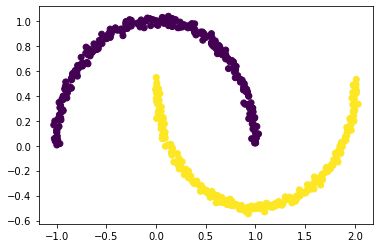

In [78]:
import matplotlib.pyplot as plt 
from sklearn.datasets import make_moons 
  
X, y = make_moons(n_samples = 500, noise = 0.02, random_state = 417) 
  
plt.scatter(X[:, 0], X[:, 1], c = y) 
plt.show() 


Let’s apply PCA on this dataset

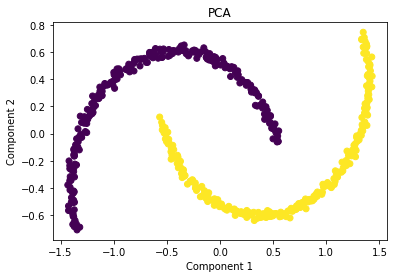

In [79]:
pca = PCA(n_components = 2) 
X_pca = pca.fit_transform(X) 
   
plt.title("PCA") 
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y) 
plt.xlabel("Component 1") 
plt.ylabel("Component 2") 
plt.show() 

PCA failed to distinguish the two classes

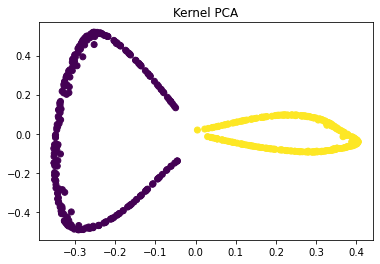

In [80]:
from sklearn.decomposition import KernelPCA 
kpca = KernelPCA(kernel ='rbf', gamma = 15) 
X_kpca = kpca.fit_transform(X) 
  
plt.title("Kernel PCA") 
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c = y) 
plt.show() 


Applying kernel PCA on this dataset with RBF kernel with a gamma value of 15


### KernelPCA exercises

* Visualize in 2d datasets used in this labs, experiment with the parameters of the KernelPCA method change kernel and gamma params. Docs: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html 

In [81]:
def perform_kernel_pca(x_data, df_standarized, kernel, gamma):
    kpca_cancer = KernelPCA(kernel=kernel, gamma=gamma, n_components=2) 
    kpca_principalComponents_cancer = kpca_cancer.fit_transform(x_data)
    kpca_principalDf_cancer = pd.DataFrame(data = kpca_principalComponents_cancer, columns = ['principal component 1', 'principal component 2'])
    return pd.concat([kpca_principalDf_cancer, df_standarized[['target']]], axis = 1)

def visualize_cancer(ax, cancer_data, df_cancer, kernel, gamma):
    ax.set_xlabel('Principal Component 1', fontsize = 13)
    ax.set_ylabel('Principal Component 2', fontsize = 13)
    gamma_title = ' and gamma={}'.format(gamma) if gamma is not None else ''
    ax.set_title('2 Component Kernel PCA with kernel={}'.format(kernel) + gamma_title, fontsize = 15)
    
    cancer_targets = cancer_data.target_names
    colors = ['r', 'b']
    for target, color in zip(cancer_targets,colors):
        indicesToKeep = df_cancer['target'] == target
        ax.scatter(df_cancer.loc[indicesToKeep, 'principal component 1']
                   , df_cancer.loc[indicesToKeep, 'principal component 2']
                   , c = color
                   , s = 50)
    ax.legend(cancer_targets)
    ax.grid(color='#eeeeee')
    ax.set_axisbelow(True)

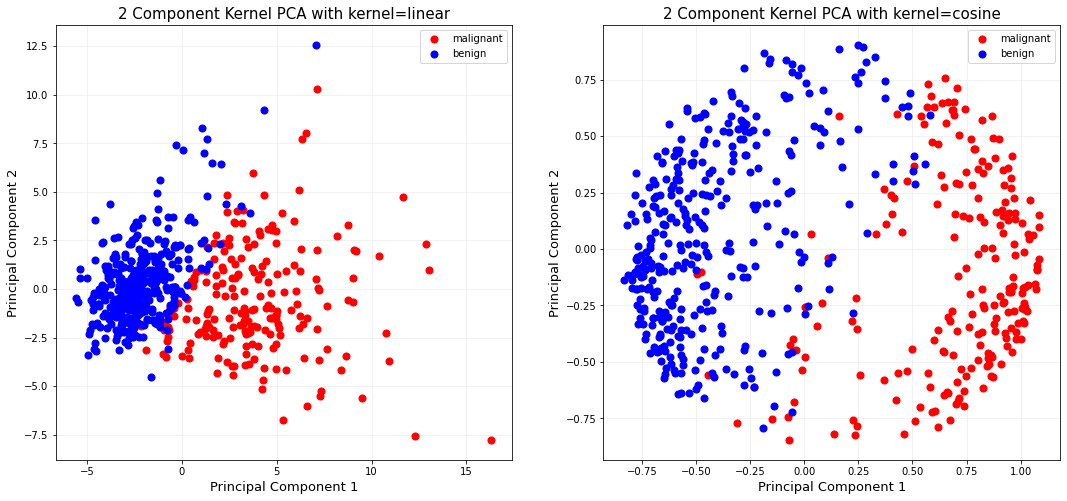

In [82]:
# TODO
fig = plt.figure(figsize = (18,8))
for plot_num, kernel in enumerate(['linear', 'cosine']):
    ax = fig.add_subplot(1,2,plot_num+1)
    df_cancer_kpca = perform_kernel_pca(x_cancer, df_cancer_standarize, kernel, None)
    visualize_cancer(ax, cancer_data, df_cancer_kpca, kernel, None)
plt.show()

In [83]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return true;
}

<IPython.core.display.Javascript object>

In [84]:
def plot_different_gammas(kernel, gamma_range):
    fig = plt.figure(figsize = (18,90))
    for plot_num, gamma in enumerate(gamma_range):
        ax = fig.add_subplot(10,2,plot_num+1)
        df_cancer_kpca = perform_kernel_pca(x_cancer, df_cancer_standarize, kernel, gamma)
        visualize_cancer(ax, cancer_data, df_cancer_kpca, kernel, gamma)
    plt.show()

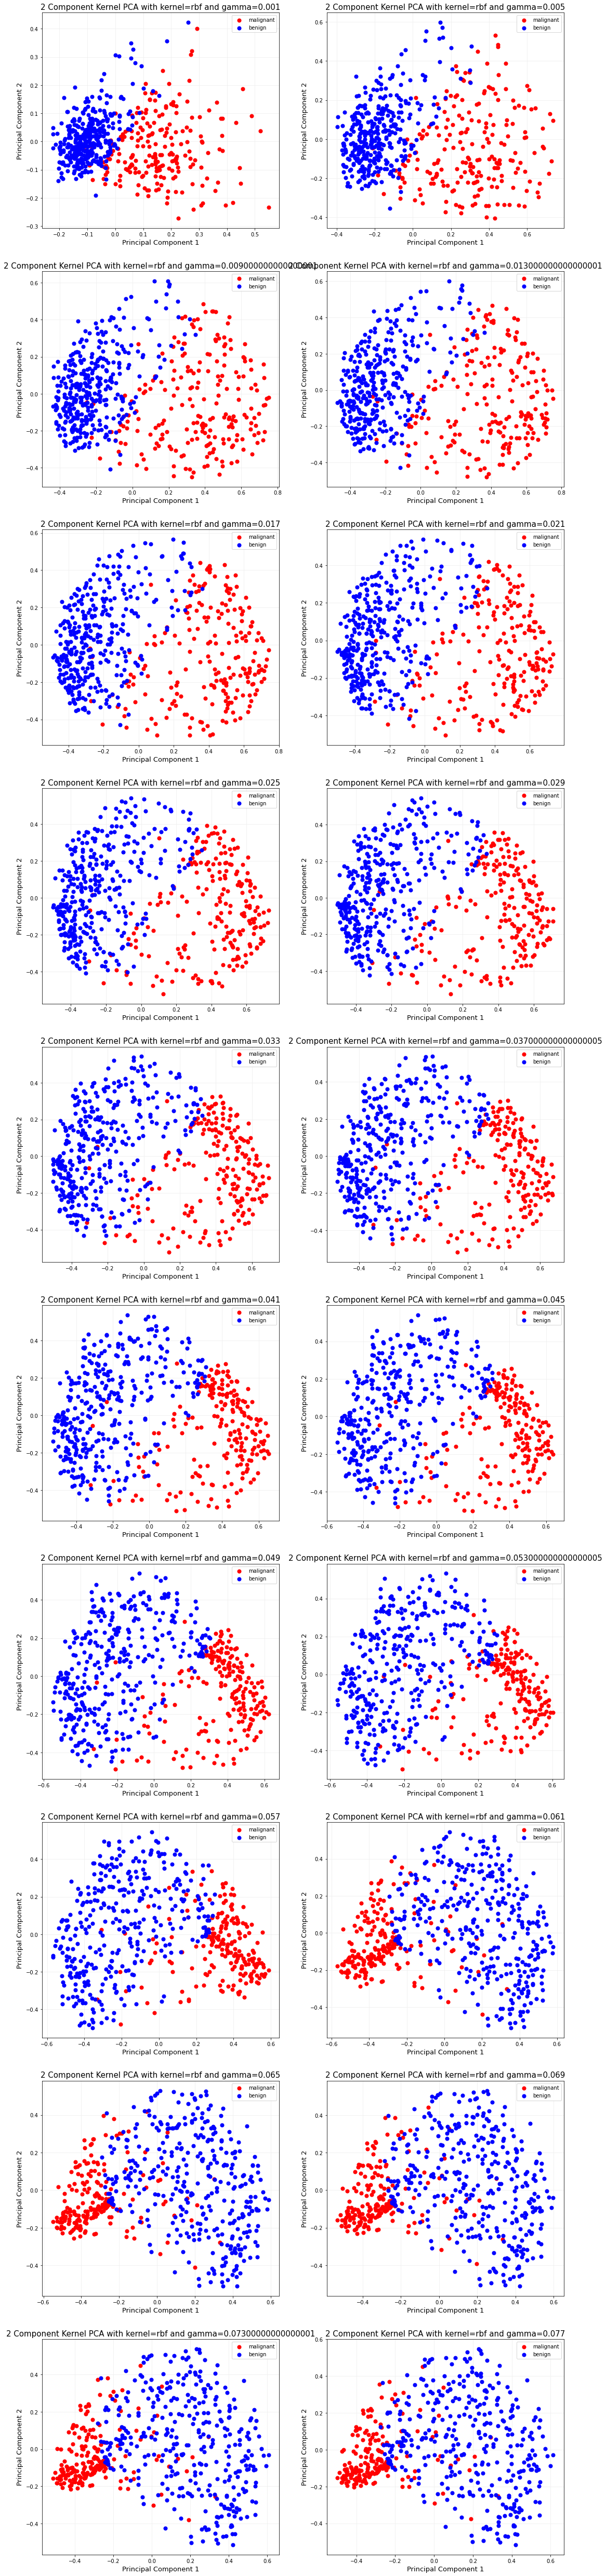

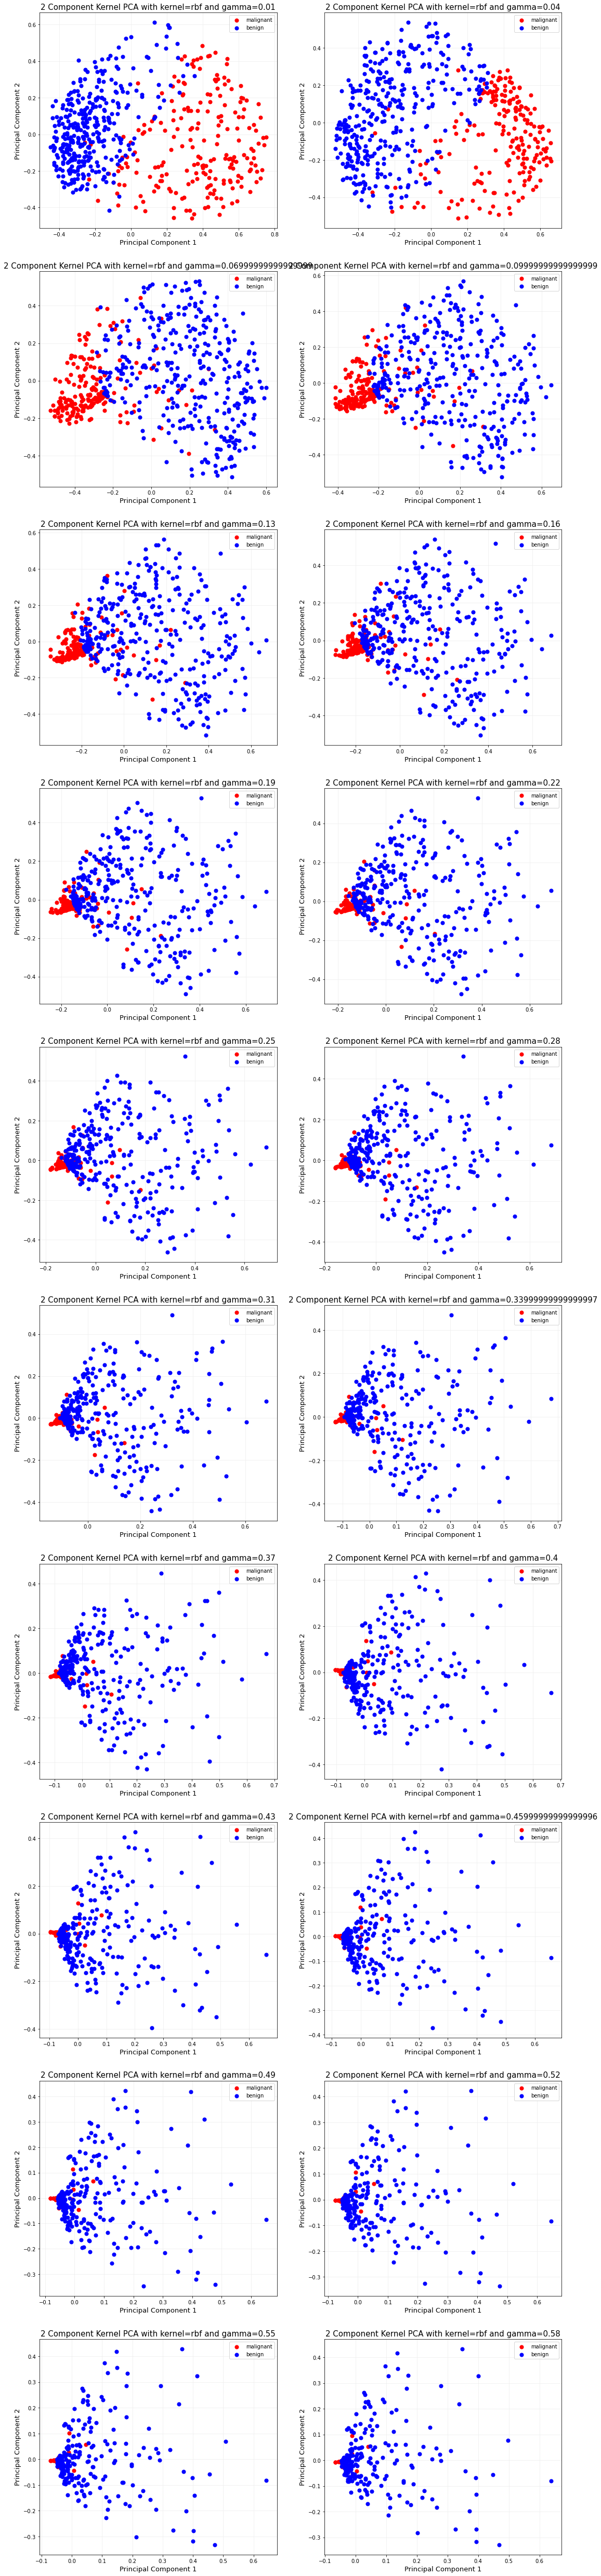

In [85]:
plot_different_gammas('rbf', np.arange(0.001, 0.079, 0.004))
plot_different_gammas('rbf', np.arange(0.01, 0.59, 0.03))

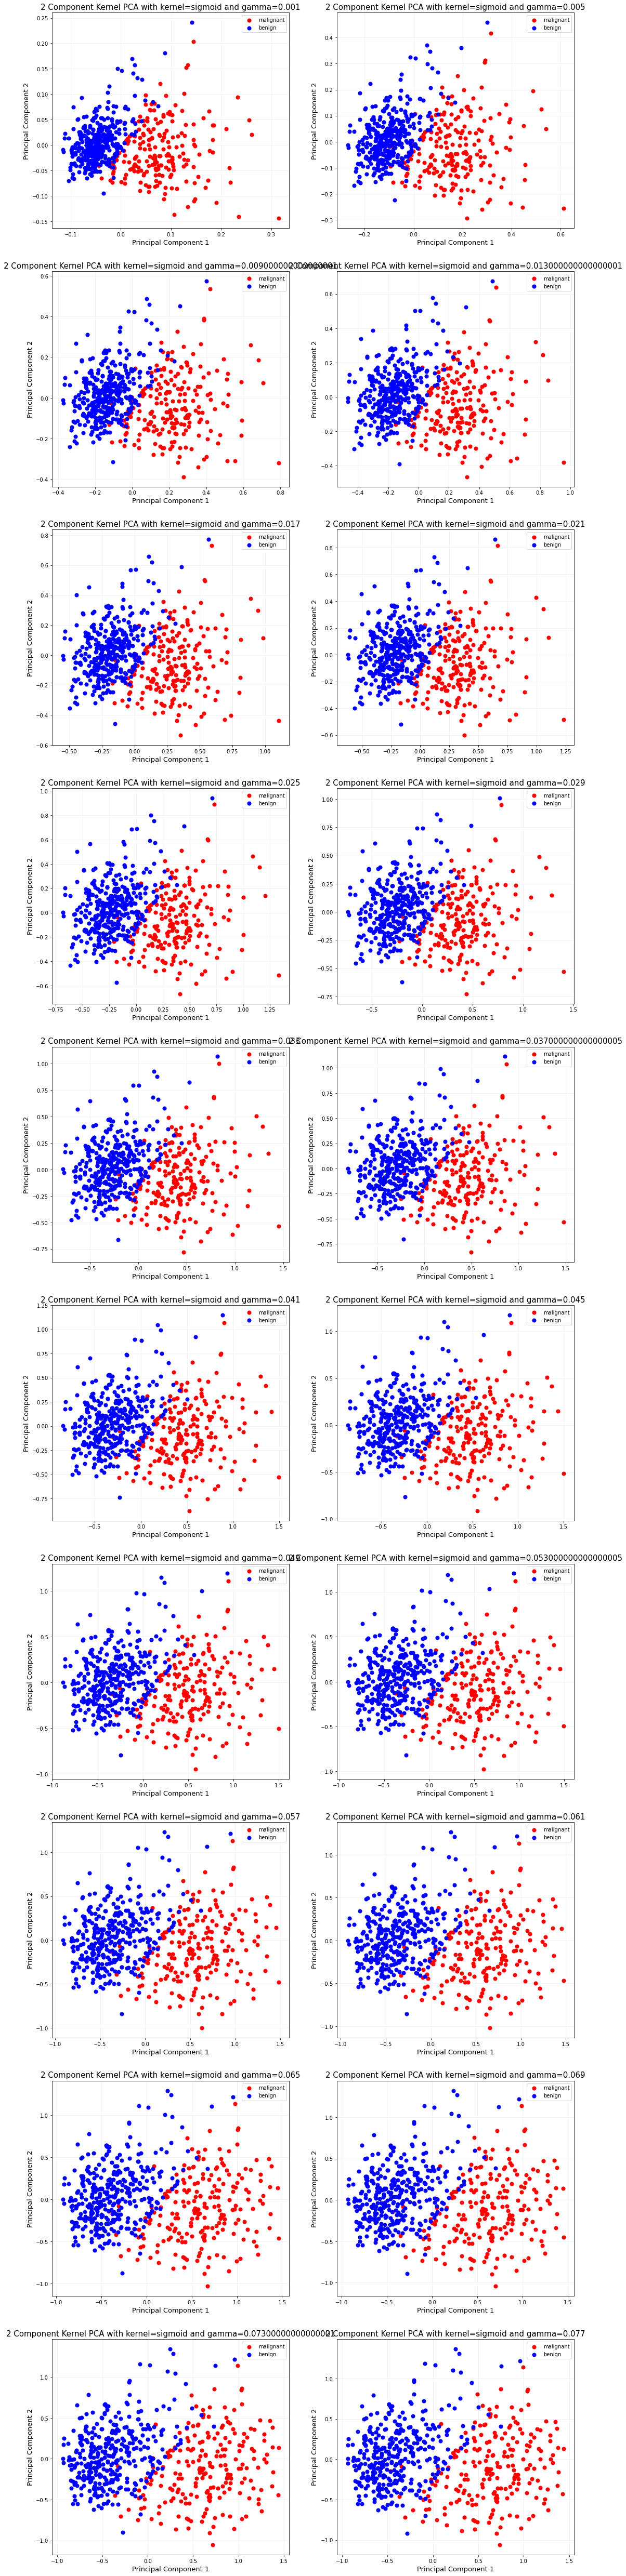

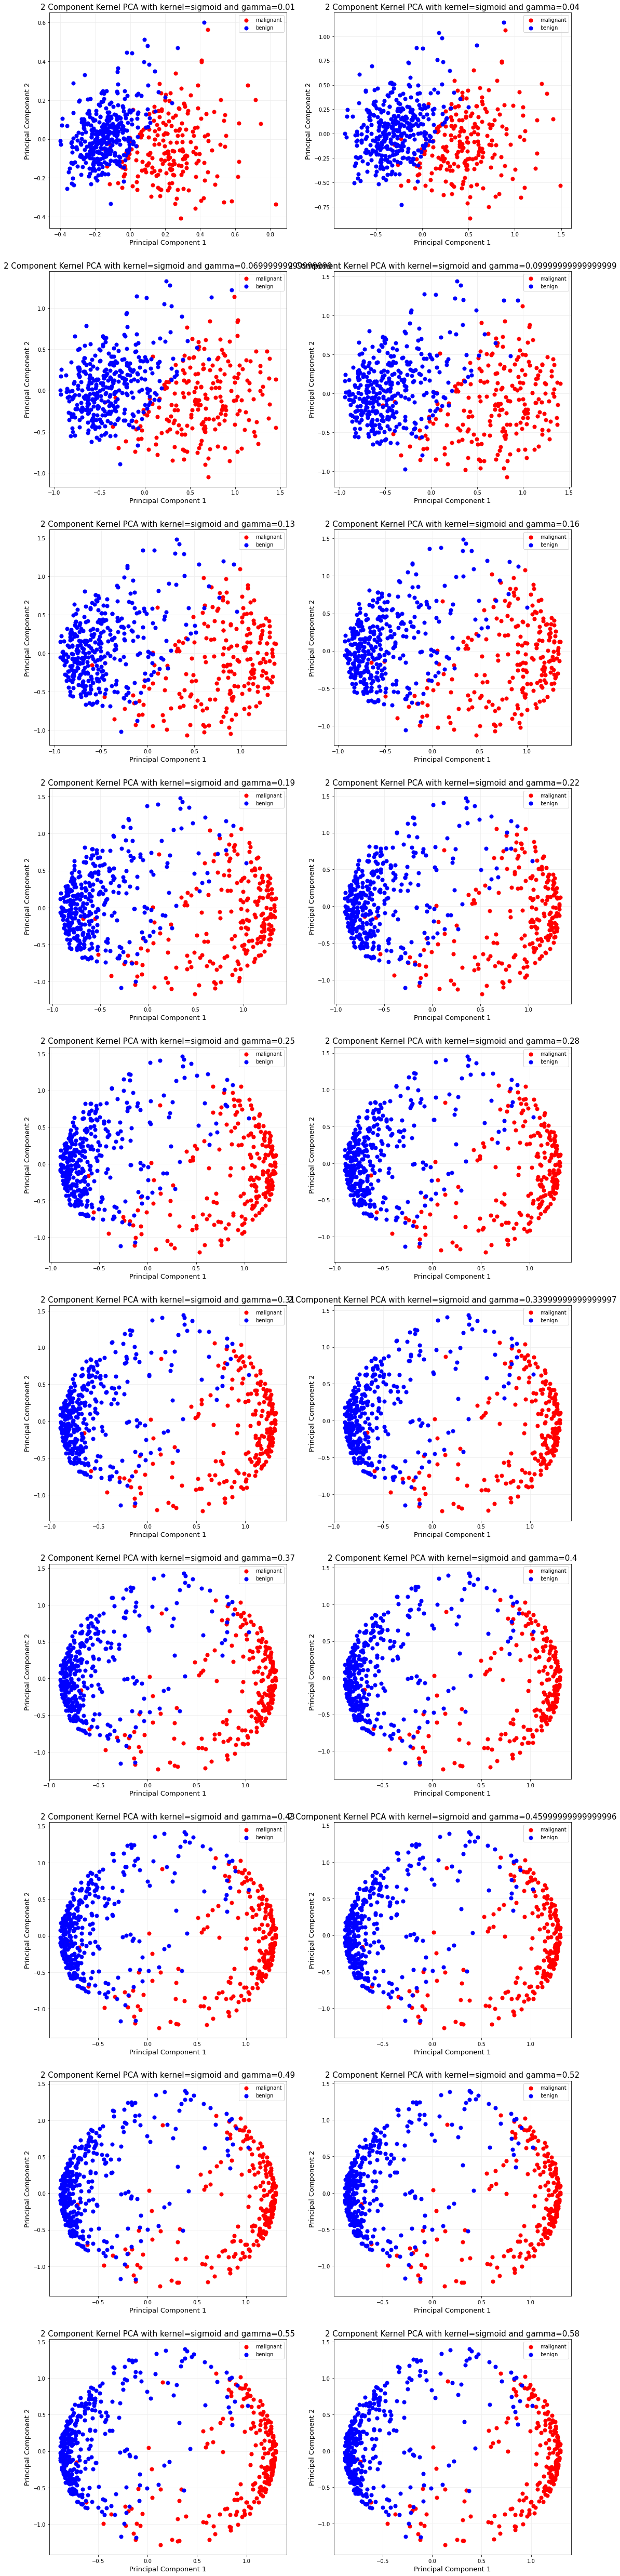

In [86]:
plot_different_gammas('sigmoid', np.arange(0.001, 0.079, 0.004))
plot_different_gammas('sigmoid', np.arange(0.01, 0.59, 0.03))

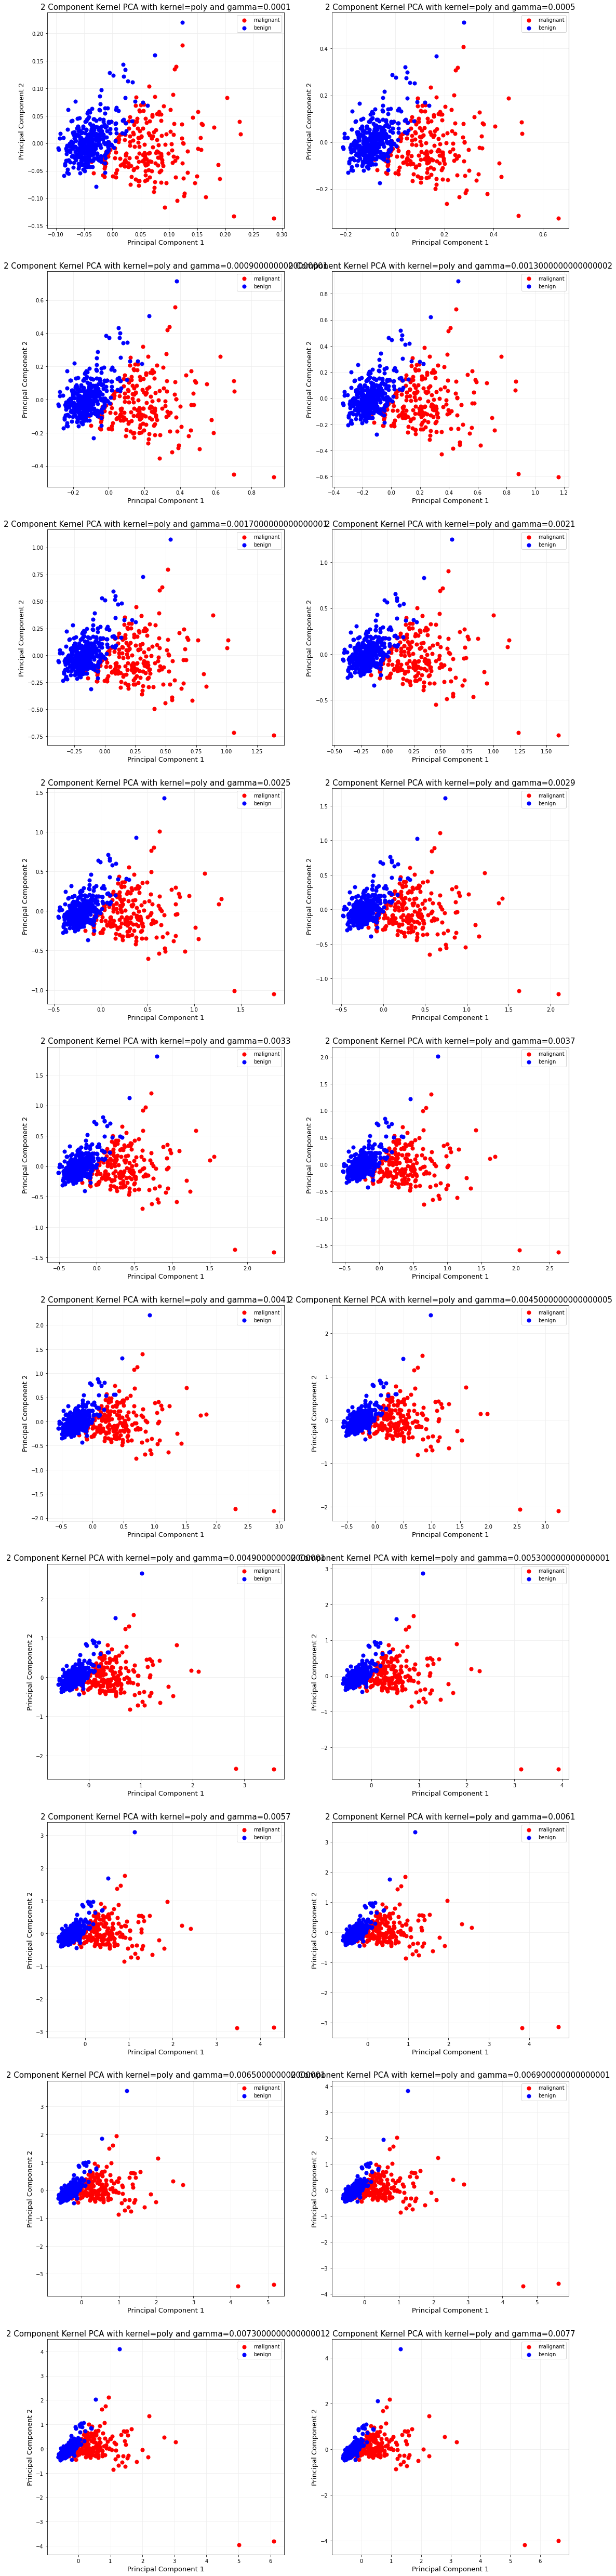

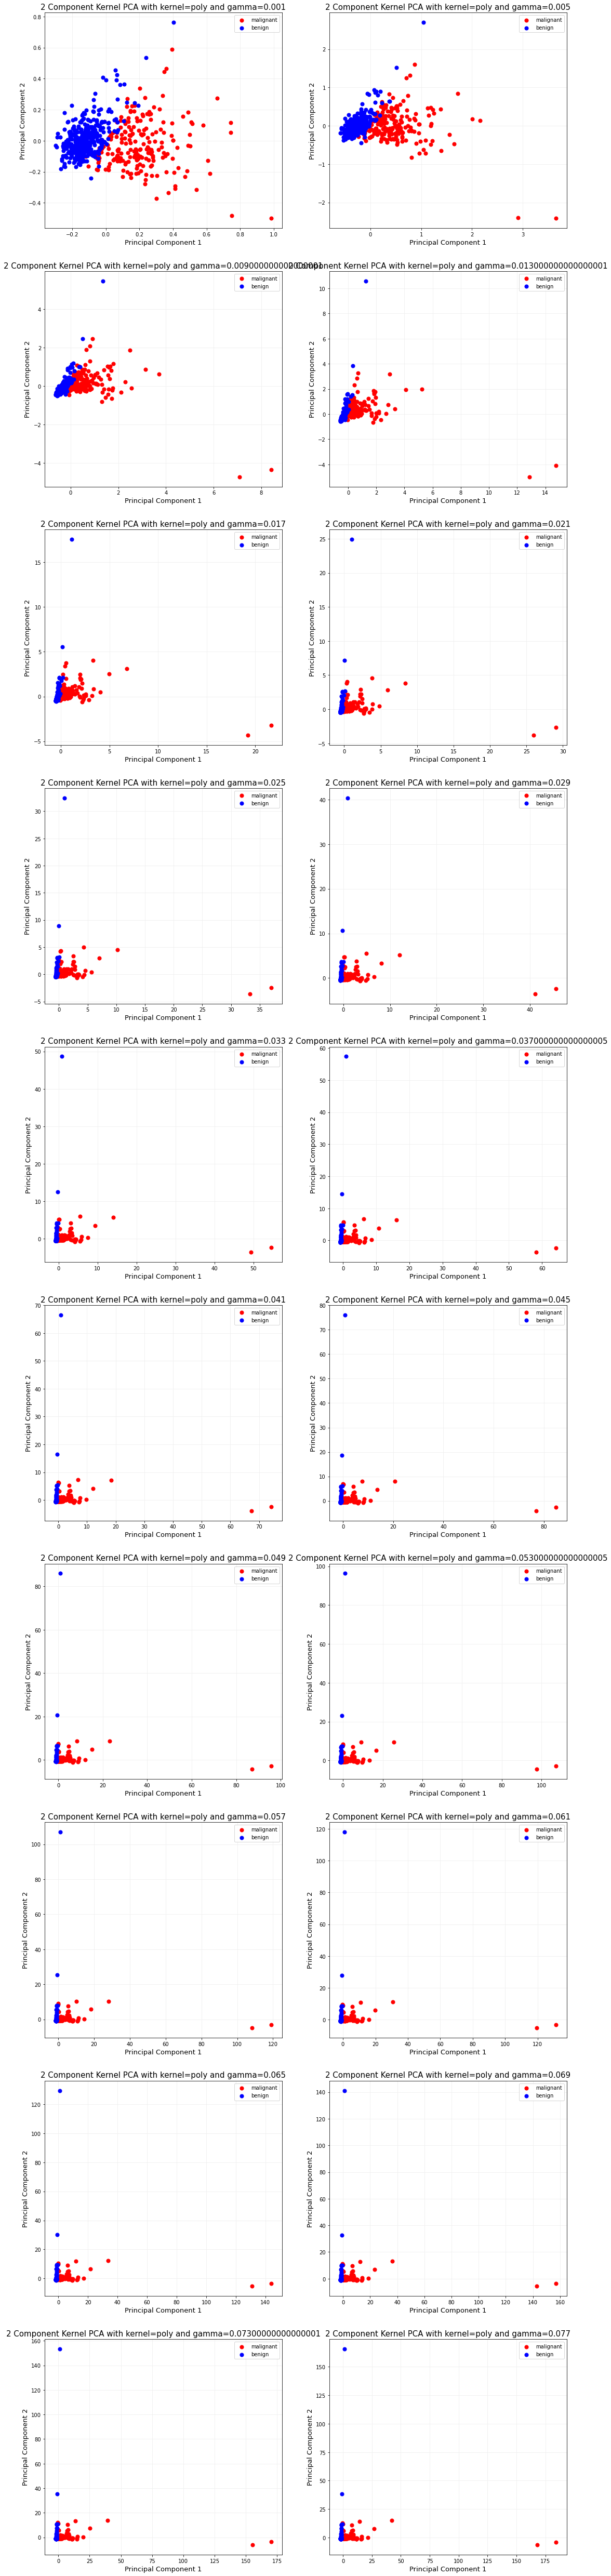

In [87]:
plot_different_gammas('poly', np.arange(0.0001, 0.0079, 0.0004))
plot_different_gammas('poly', np.arange(0.001, 0.079, 0.004))

Linear and cosine kernels separate data really well. There are some points lying among data from another cluster, but amount of them is not that big.
Rbf and sigmoid kernels work similar with low gamma value (0.001), but when gamma value increases (above 0.1) rbf starts performing worse and sigmoid separates the clusters even more.
Poly kernel needs much lower gamma than rbf and sigmoid to divide data into clusters. Above 0.01 it is not efficient.

In [88]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Homework

* Download the MNIST data set (there is a function to load this set in libraries such as scikit-learn, keras). It is a collection of black and white photos of handwritten digits with a resolution of 28x28 pixels. which together gives 784 dimensions.

* Try to visualize this dataset using PCA and KernelPCA, don't expect full separation of the data

* Similar to the exercises, examine explained variance. draw explained variance vs number of principal Components plot.

* Find number of principal components for 99%, 95%, 90%, and 85% of explained variance.

* Draw some sample MNIST digits and from PCA of its images transform data back to its original space (https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.inverse_transform). Make an inverse transformation for number of components coresponding with explained variance shown above and draw the reconstructed images. The idea of this exercise is to see visually how depending on the number of components some information is lost.

* Perform the same reconstruction using KernelPCA (make comparisons for the same components number)
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA.inverse_transform


## Useful links
https://scikit-learn.org
https://towardsdatascience.com/introduction-to-principal-component-analysis-pca-with-python-code-69d3fcf19b57
https://towardsdatascience.com/kernel-pca-vs-pca-vs-ica-in-tensorflow-sklearn-60e17eb15a64

In [89]:
from sklearn.datasets import load_digits

In [90]:
digits_data = load_digits()
df_digits = pd.DataFrame(digits_data.data)
df_digits['target'] = pd.Categorical(pd.Series(digits_data.target).map(lambda x: digits_data.target_names[x]))
df_digits

0    1     2     3     4     5    6    7    8    9  ...   55   56  \
0     0.0  0.0   5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1     0.0  0.0   0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2     0.0  0.0   0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3     0.0  0.0   7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  0.0  0.0   
4     0.0  0.0   0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
...   ...  ...   ...   ...   ...   ...  ...  ...  ...  ...  ...  ...  ...   
1792  0.0  0.0   4.0  10.0  13.0   6.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
1793  0.0  0.0   6.0  16.0  13.0  11.0  1.0  0.0  0.0  0.0  ...  0.0  0.0   
1794  0.0  0.0   1.0  11.0  15.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1795  0.0  0.0   2.0  10.0   7.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1796  0.0  0.0  10.0  14.0   8.0   1.0  0.0  0.0  0.0  2.0  ...  0.0  0.0   

       57   58    59    60    61   62   63  target  
0     0.0  6.0  13.0  10.0   0.0  0.0  0.0       0  
1     0.0  0.0  11.0  16.0  10.0  0.0  0.0       1  
2     0.0  0.0   3.0  11.0  16.0  9.0  0.0       2  
3     0.0  7.0  13.0  13.0   9.0  0.0  0.0       3  
4     0.0  0.0   2.0  16.0   4.0  0.0  0.0       4  
...   ...  ...   ...   ...   ...  ...  ...     ...  
1792  0.0  2.0  14.0  15.0   9.0  0.0  0.0       9  
1793  0.0  6.0  16.0  14.0   6.0  0.0  0.0       0  
1794  0.0  2.0   9.0  13.0   6.0  0.0  0.0       8  
1795  0.0  5.0  12.0  16.0  12.0  0.0  0.0       9  
1796  1.0  8.0  12.0  14.0  12.0  1.0  0.0       8  

[1797 rows x 65 columns]

In [91]:
x_digits = df_digits.loc[:, [i for i in range(64)]].values
x_digits = StandardScaler().fit_transform(x_digits)
df_digits_standarize = pd.DataFrame(x_digits)
df_digits_standarize['target'] = df_digits['target']
df_digits_standarize

0         1         2         3         4         5         6  \
0     0.0 -0.335016 -0.043081  0.274072 -0.664478 -0.844129 -0.409724   
1     0.0 -0.335016 -1.094937  0.038648  0.268751 -0.138020 -0.409724   
2     0.0 -0.335016 -1.094937 -1.844742  0.735366  1.097673 -0.409724   
3     0.0 -0.335016  0.377661  0.744919  0.268751 -0.844129 -0.409724   
4     0.0 -0.335016 -1.094937 -2.551014 -0.197863 -1.020657 -0.409724   
...   ...       ...       ...       ...       ...       ...       ...   
1792  0.0 -0.335016 -0.253452 -0.432200  0.268751  0.038508 -0.409724   
1793  0.0 -0.335016  0.167290  0.980343  0.268751  0.921145 -0.108958   
1794  0.0 -0.335016 -0.884566 -0.196776  0.735366 -0.844129 -0.409724   
1795  0.0 -0.335016 -0.674195 -0.432200 -1.131092 -1.020657 -0.409724   
1796  0.0 -0.335016  1.008775  0.509495 -0.897785 -0.844129 -0.409724   

             7         8         9  ...        55        56        57  \
0    -0.125023 -0.059078 -0.624009  ... -0.209785 -0.023596 -0.299081   
1    -0.125023 -0.059078 -0.624009  ... -0.209785 -0.023596 -0.299081   
2    -0.125023 -0.059078 -0.624009  ... -0.209785 -0.023596 -0.299081   
3    -0.125023 -0.059078  1.879691  ... -0.209785 -0.023596 -0.299081   
4    -0.125023 -0.059078 -0.624009  ... -0.209785 -0.023596 -0.299081   
...        ...       ...       ...  ...       ...       ...       ...   
1792 -0.125023 -0.059078 -0.311047  ... -0.209785 -0.023596 -0.299081   
1793 -0.125023 -0.059078 -0.624009  ... -0.209785 -0.023596 -0.299081   
1794 -0.125023 -0.059078 -0.624009  ... -0.209785 -0.023596 -0.299081   
1795 -0.125023 -0.059078 -0.624009  ... -0.209785 -0.023596 -0.299081   
1796 -0.125023 -0.059078  0.001916  ... -0.209785 -0.023596  0.771535   

            58        59        60        61        62        63  target  
0     0.086719  0.208293 -0.366771 -1.146647 -0.505670 -0.196008       0  
1    -1.089383 -0.249010  0.849632  0.548561 -0.505670 -0.196008       1  
2    -1.089383 -2.078218 -0.164037  1.565686  1.695137 -0.196008       2  
3     0.282736  0.208293  0.241430  0.379040 -0.505670 -0.196008       3  
4    -1.089383 -2.306869  0.849632 -0.468564 -0.505670 -0.196008       4  
...        ...       ...       ...       ...       ...       ...     ...  
1792 -0.697349  0.436944  0.646898  0.379040 -0.505670 -0.196008       9  
1793  0.086719  0.894246  0.444164 -0.129523 -0.505670 -0.196008       0  
1794 -0.697349 -0.706312  0.241430 -0.129523 -0.505670 -0.196008       8  
1795 -0.109298 -0.020358  0.849632  0.887602 -0.505670 -0.196008       9  
1796  0.478753 -0.020358  0.444164  0.887602 -0.261136 -0.196008       8  

[1797 rows x 65 columns]

In [92]:
pca_digits = PCA(n_components=2)
principalComponents_digits = pca_digits.fit_transform(x_digits)
principalDf_digits = pd.DataFrame(data = principalComponents_digits ,columns = ['principal component 1', 'principal component 2'])
finalDf_digits = pd.concat([principalDf_digits, df_digits[['target']]], axis = 1)

In [93]:
def visualize_digits(ax, digits_data, df_digits, kernel, gamma):
    ax.set_xlabel('Principal Component 1', fontsize = 13)
    ax.set_ylabel('Principal Component 2', fontsize = 13)
    if kernel is not None:
        gamma_title = ' and gamma={}'.format(gamma) if gamma is not None else ''
        title = '2 Component Kernel PCA with kernel={}'.format(kernel) + gamma_title
    else:
        title = '2 component PCA for MNIST dataset'
    ax.set_title(title, fontsize = 15)

    digits_targets = digits_data.target_names
    colors = sns.color_palette('bright')
    for target, color in zip(digits_targets, colors):
        indicesToKeep = df_digits['target'] == target
        ax.scatter(df_digits.loc[indicesToKeep, 'principal component 1']
                   , df_digits.loc[indicesToKeep, 'principal component 2']
                   , c = np.atleast_2d(color)
                   , s = 50)
    ax.legend(digits_targets)
    ax.grid(color='#eeeeee')
    ax.set_axisbelow(True)

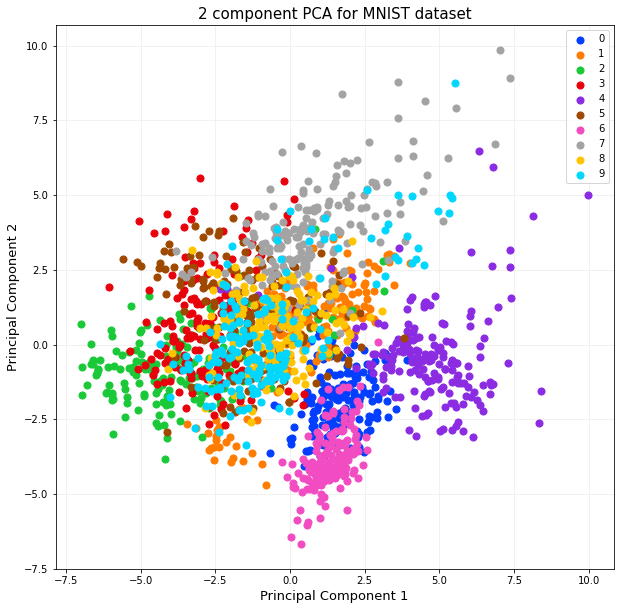

In [94]:
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
visualize_digits(ax, digits_data, finalDf_digits, None, None)

Visualized data are not fully separated, but colors help to see that the points related to specific digits are mostly close to each other. However, points for a few digits are totally overlapped, making it impossible to perform efficient clusterization.

In [95]:
pca_digits = PCA(n_components=64)
pca_digits.fit_transform(x_digits)
ratio = pca_digits.explained_variance_ratio_
sums = [sum(ratio[:n]) for n in range(1, 65)]
sums

[0.12033916097734894,
 0.215949705008328,
 0.3003938539345736,
 0.3653779330098152,
 0.4139794817694792,
 0.45612068046219834,
 0.4955415084978721,
 0.5294353177442555,
 0.5594175278605077,
 0.5887375533730298,
 0.6165556080085328,
 0.6423261589343527,
 0.6650791920919952,
 0.6873509894871387,
 0.7090032838056312,
 0.7281449498700524,
 0.7459004207217345,
 0.7622811134645786,
 0.7782457151532021,
 0.7931376270240802,
 0.8066173226822596,
 0.8193366363846074,
 0.8309950098905269,
 0.8415714758758901,
 0.8513246353478712,
 0.8607702252451912,
 0.8694003635148985,
 0.8777667920515836,
 0.885743724535696,
 0.8932084382449568,
 0.9004642597586595,
 0.9073833722134713,
 0.9139224575691975,
 0.9203303833076575,
 0.926244224424881,
 0.9319558484771162,
 0.9371922165112825,
 0.9420102923757339,
 0.9465474849743184,
 0.9507791125066462,
 0.9548396432064366,
 0.9588104912891948,
 0.962375424320621,
 0.965783296135324,
 0.9690616494882035,
 0.9721719695616571,
 0.9750577225027465,
 0.9778226151379

In [96]:
thresholds = [0.85, 0.9, 0.95, 0.99]
thresholds_components_num = {}
threshold_num = 0
for components_num, ratios_sum in enumerate(sums):
    if threshold_num < len(thresholds) and ratios_sum > thresholds[threshold_num]:
        print('Explained variance ratio over {} for {} components'.format(thresholds[threshold_num], components_num + 1))
        thresholds_components_num[thresholds[threshold_num]] = components_num + 1
        threshold_num += 1

Explained variance ratio over 0.85 for 25 components
Explained variance ratio over 0.9 for 31 components
Explained variance ratio over 0.95 for 40 components
Explained variance ratio over 0.99 for 54 components


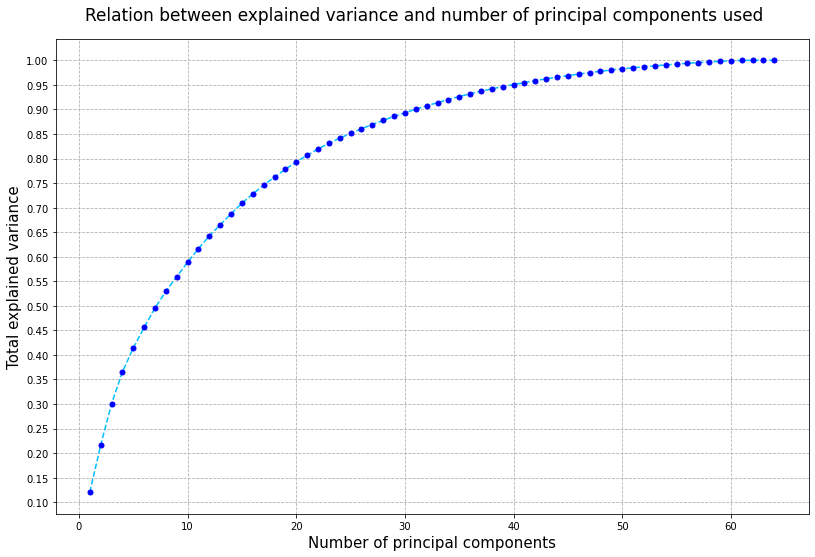

In [97]:
fig, ax = plt.subplots()
fig.set_size_inches(12,8)
fig.tight_layout(pad=4)
fig.suptitle('Relation between explained variance and number of principal components used', fontsize=17)
ax.plot(np.arange(1, 65), sums, linestyle='--', marker='o', color='deepskyblue', markersize=5, mfc='b', mec='b')
ax.set_xlabel('Number of principal components', fontsize=15)
ax.set_ylabel('Total explained variance', fontsize=15)
ax.set_yticks(np.arange(0.1, 1.01, 0.05))
plt.grid(linestyle='--')
plt.show()

In this dataset the difference between explained variance ratios for the first few components is not as big as in the cancer dataset. There is not any component that contains larger part of total explained variance. In order to achieve high total explained variance a bigger number of components has to be preserved.

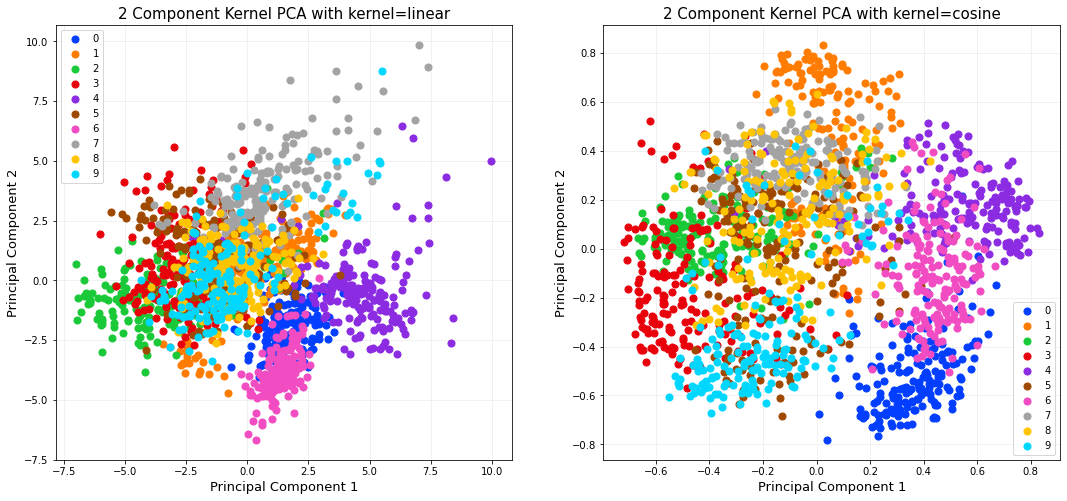

In [98]:
fig = plt.figure(figsize = (18,8))
for plot_num, kernel in enumerate(['linear', 'cosine']):
    ax = fig.add_subplot(1,2,plot_num+1)
    df_digits_kpca = perform_kernel_pca(x_digits, df_digits_standarize, kernel, None)
    visualize_digits(ax, digits_data, df_digits_kpca, kernel, None)
plt.show()

Visualization of Kernel PCA with linear kernel gives result similar to standard PCA. Using cosine kernel looks a bit better, but still the clusters cannot be separated and most of the groups overlap themselves to a large degree.
Linear kernel tends to leave more outliers than cosine kernel, which transforms all of the observations to points with coordinates between -1 and 1. 

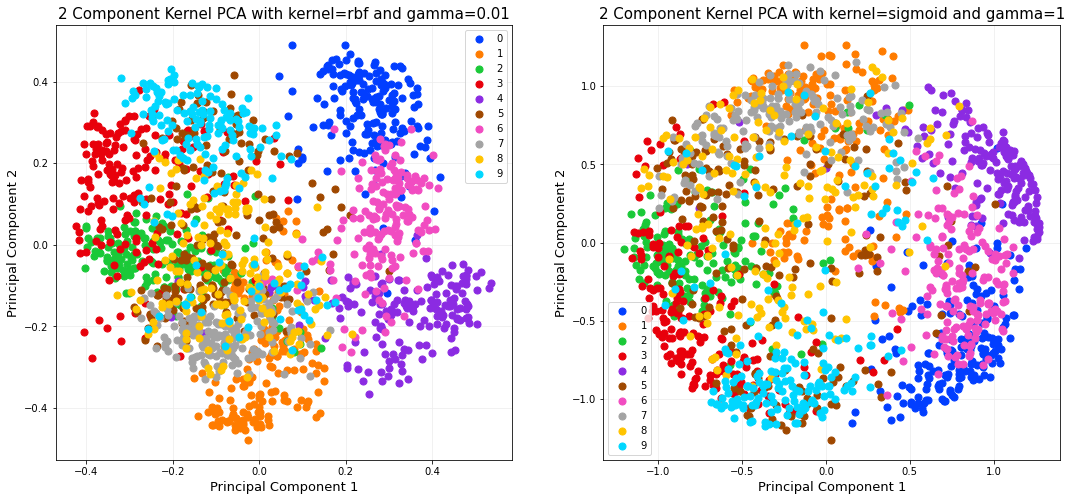

In [102]:
fig = plt.figure(figsize = (18,8))
ax = fig.add_subplot(1,2,1)
df_digits_kpca = perform_kernel_pca(x_digits, df_digits_standarize, 'rbf', 0.01)
visualize_digits(ax, digits_data, df_digits_kpca, 'rbf', 0.01)
ax = fig.add_subplot(1,2,2)
df_digits_kpca = perform_kernel_pca(x_digits, df_digits_standarize, 'sigmoid', 1)
visualize_digits(ax, digits_data, df_digits_kpca, 'sigmoid', 1)
plt.show()

Like in earlier tests of PCA on digits dataset, Kernel PCA also did not separated the data completely. Both rbf and sigmoid kernels separated the same groups and the other ones are still overlapped. Gamma parameters were selected based on earlier experiments in order to divide data as much as possible.

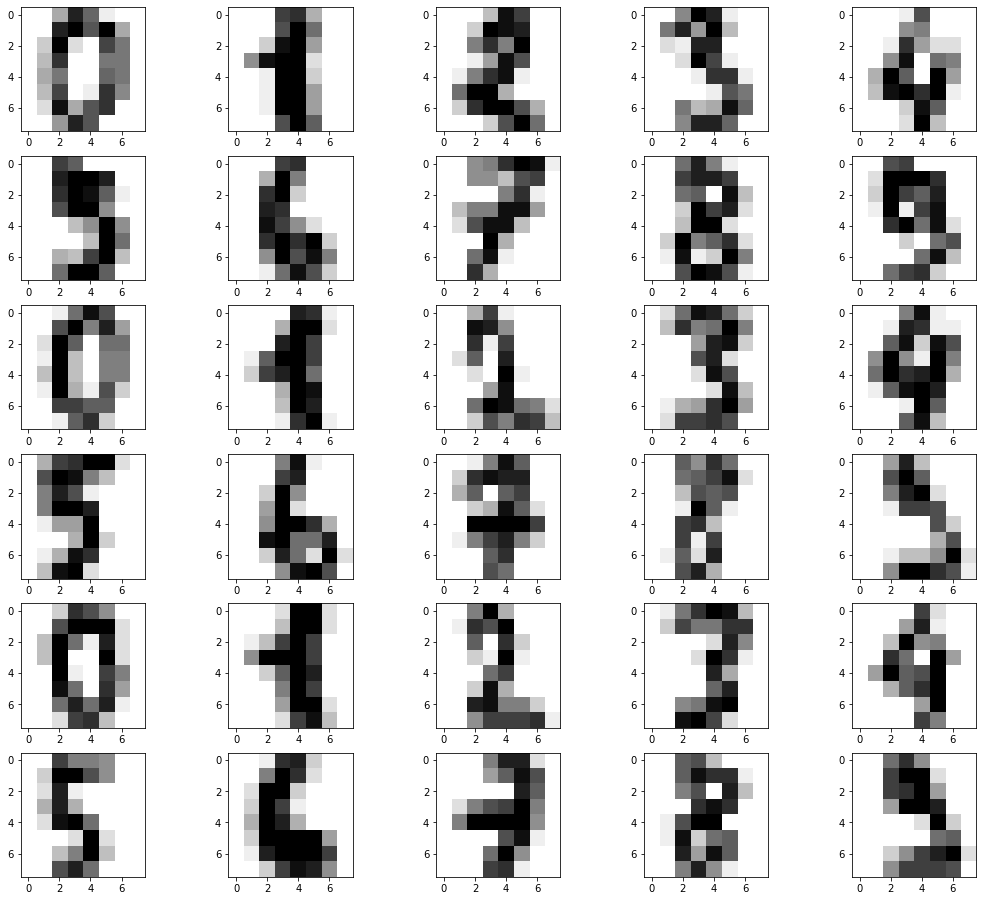

In [265]:
fig, axarr = plt.subplots(6,5)
fig.set_size_inches(18,16)
for i in range(30):
    axarr[i//5, i%5].imshow(digits_data.images[i], cmap=plt.cm.gray_r)

Explained variance ratio over: 0.85, number of components: 25


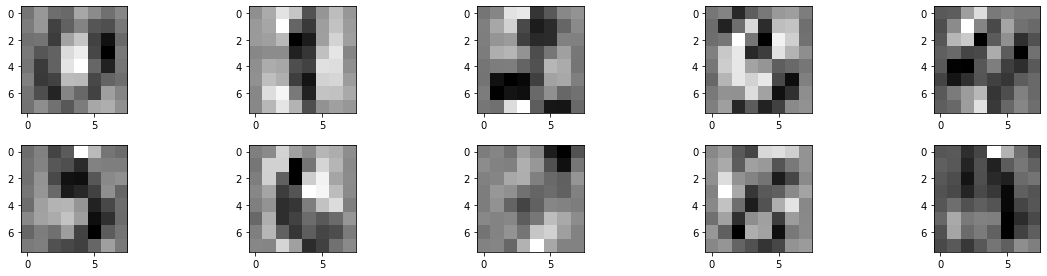

Explained variance ratio over: 0.9, number of components: 31


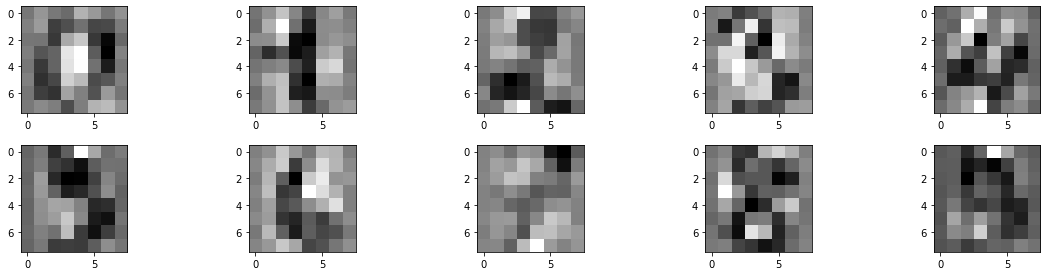

Explained variance ratio over: 0.95, number of components: 40


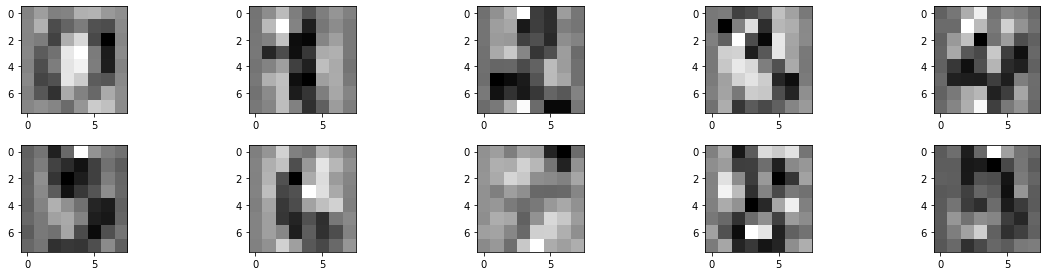

Explained variance ratio over: 0.99, number of components: 54


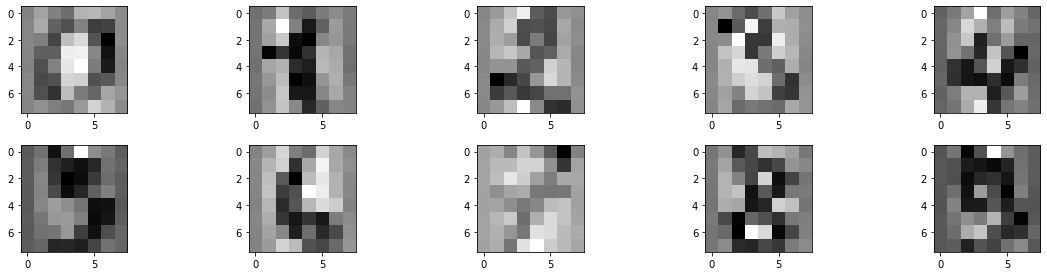

In [273]:
for threshold in thresholds:
    print('Explained variance ratio over: {}, number of components: {}'.format(threshold, thresholds_components_num[threshold]))
    pca_digits = PCA(n_components=thresholds_components_num[threshold])
    principalComponents_digits = pca_digits.fit_transform(x_digits)
    inverse = pca_digits.inverse_transform(principalComponents_digits)
    fig, axarr = plt.subplots(2,5)
    fig.set_size_inches(16,4)
    plt.tight_layout()
    for i in range(10):
        axarr[i//5, i%5].imshow(np.array_split(inverse[i], 8), cmap=plt.cm.gray_r)
    plt.show()

Kernel PCA on digits set - number of components: 25


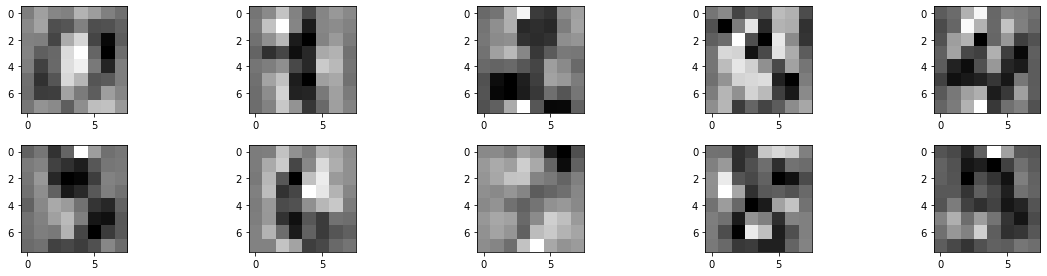

Kernel PCA on digits set - number of components: 31


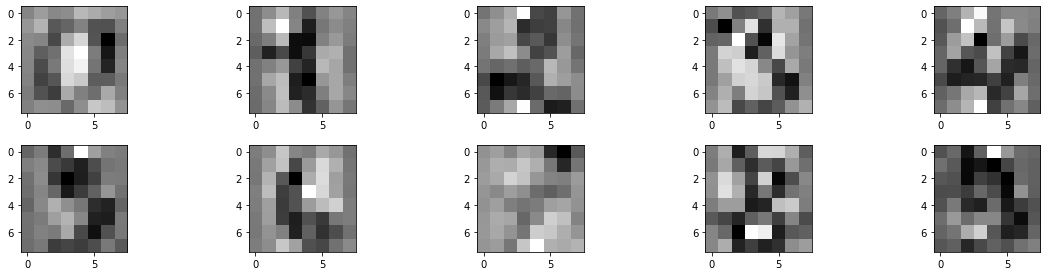

Kernel PCA on digits set - number of components: 40


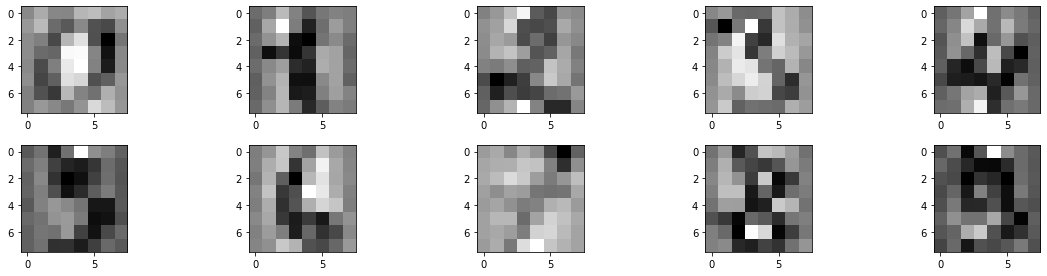

Kernel PCA on digits set - number of components: 54


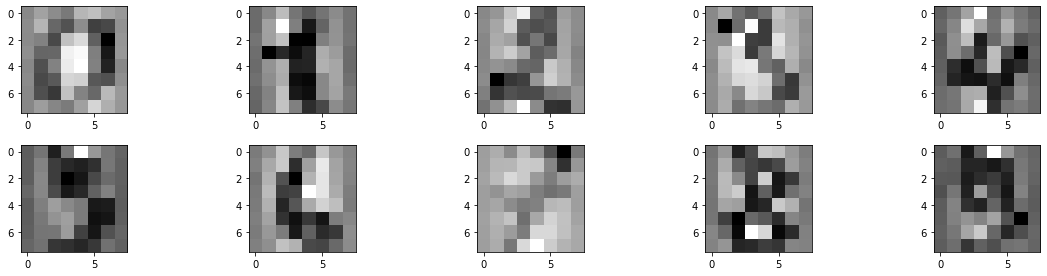

In [275]:
for threshold in thresholds:
    print('Kernel PCA on digits set - number of components: {}'.format(thresholds_components_num[threshold]))
    kpca_digits = KernelPCA(n_components=thresholds_components_num[threshold], kernel='cosine', fit_inverse_transform=True)
    principalComponents_digits = kpca_digits.fit_transform(x_digits)
    inverse = kpca_digits.inverse_transform(principalComponents_digits)
    fig, axarr = plt.subplots(2,5)
    fig.set_size_inches(16,4)
    plt.tight_layout()
    for i in range(10):
        axarr[i//5, i%5].imshow(np.array_split(inverse[i], 8), cmap=plt.cm.gray_r)
    plt.show()

In [279]:
pca_digits_25 = PCA(n_components=25)
principalComponents_digits_pca_25 = pca_digits_25.fit_transform(x_digits)
inverse_pca_25 = pca_digits_25.inverse_transform(principalComponents_digits_pca_25)

pca_digits_50 = PCA(n_components=50)
principalComponents_digits_pca_50 = pca_digits_50.fit_transform(x_digits)
inverse_pca_50 = pca_digits_50.inverse_transform(principalComponents_digits_pca_50)

kpca_digits_25 = KernelPCA(n_components=25, kernel='cosine', fit_inverse_transform=True)
principalComponents_digits_kpca_25 = kpca_digits_25.fit_transform(x_digits)
inverse_kpca_25 = kpca_digits_25.inverse_transform(principalComponents_digits_kpca_25)

kpca_digits_50 = KernelPCA(n_components=50, kernel='cosine', fit_inverse_transform=True)
principalComponents_digits_kpca_50 = kpca_digits_50.fit_transform(x_digits)
inverse_kpca_50 = kpca_digits_50.inverse_transform(principalComponents_digits_kpca_50)

Images below show first 10 digits from MNIST dataset after performing PCA or Kernel PCA with cosine kernel and applying inverse transformation.
Columns from left to right show respectively:
* original image
* image after PCA with 25 components
* image after Kernel PCA with 25 components
* image after PCA with 50 components
* image after Kernel PCA with 50 components

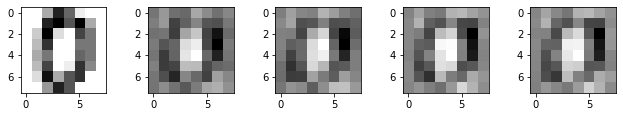

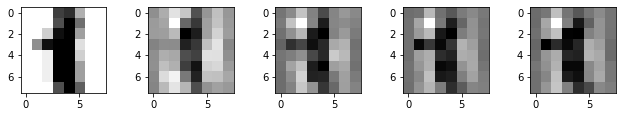

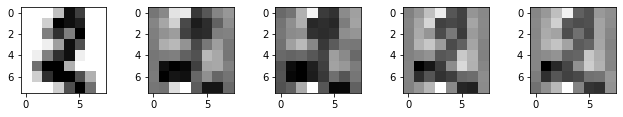

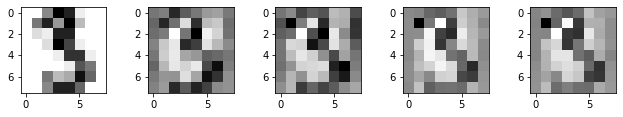

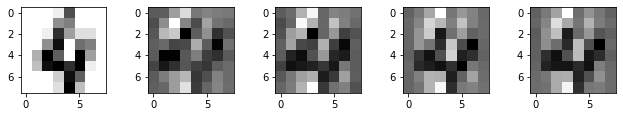

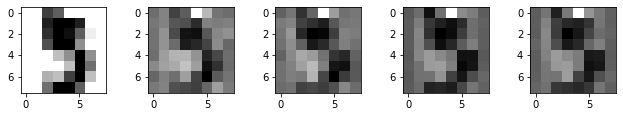

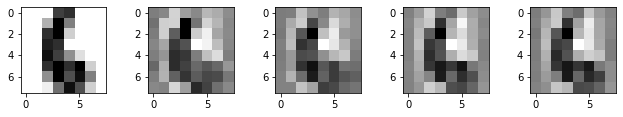

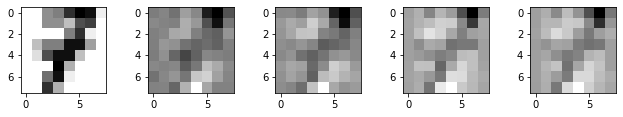

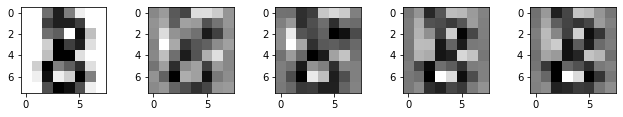

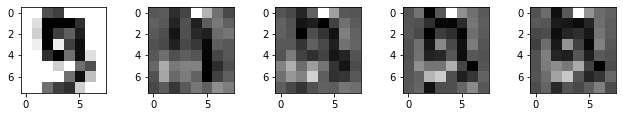

In [340]:
for i in range(10):
    fig, axarr = plt.subplots(1,5)
    fig.set_size_inches(9,3)
    plt.tight_layout()
    axarr[0].imshow(digits_data.images[i], cmap=plt.cm.gray_r)
    axarr[1].imshow(np.array_split(inverse_pca_25[i], 8), cmap=plt.cm.gray_r)
    axarr[2].imshow(np.array_split(inverse_kpca_25[i], 8), cmap=plt.cm.gray_r)
    axarr[3].imshow(np.array_split(inverse_pca_50[i], 8), cmap=plt.cm.gray_r)
    axarr[4].imshow(np.array_split(inverse_kpca_50[i], 8), cmap=plt.cm.gray_r)
    plt.show()

In most of the 10 cases above, Kernel PCA performed better than PCA or at least not worse. 
Images of some digits, e. g. 7 were not preserved well.
In some cases (like 1 or 9) there is a big difference between the quality of the image recovered after processing dependent on number of components set for PCA or Kernel PCA.